# ANN in PyTorch

### This jupyter notebook is based on ANN and its workflow in pytorch



![image.png](attachment:1d8dca64-6f05-484f-81dc-2fb7120f5acb.png)

## Implementing a Linear Regression with low level Api

We will start by implementing linear regression using tensors and autograd directly,
then we will simplify the code using PyTorch’s high-level API

In [4]:
# import necrssary libraries and tools
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn  # nn contain all the building blocks of the neural network

In [5]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

In [6]:
device

'cpu'

In [7]:
from sklearn.datasets import _california_housing, fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
print(housing.data.shape)
print(housing.target.shape)

(20640, 8)
(20640,)


In [8]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target,random_state=42)
x_train,x_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state=42)

now lets convert the data into tensor using tensor operations

In [9]:
x_train = torch.FloatTensor(x_train)
x_valid = torch.FloatTensor(x_valid)
X_test = torch.FloatTensor(X_test)
means = x_train.mean(dim=0,keepdim=True)
stds = x_train.std(dim=0,keepdim=True)
x_train = (x_train - means) / stds
x_valid = (x_valid - means) / stds
X_test = (X_test - means) / stds

Let’s also convert the targets to tensors. Since our predictions will be column vectors
(i.e., matrices with a single column), we need to ensure that our targets are also
column vectors.

In [10]:
y_train = torch.FloatTensor(y_train).reshape(-1,1)
y_valid = torch.FloatTensor(y_valid).reshape(-1,1)
y_test = torch.FloatTensor(y_test).reshape(-1,1)

now the data is ready , lets create the parameter of our linear regression

In [11]:
torch.manual_seed(42)
n_features = x_train.shape[1]  # there are 8 input features
w = torch.randn((n_features,1),requires_grad=True)
b = torch.tensor(0.,requires_grad=True)

We now have a weights parameter w (a column vector with one weight per input
dimension, in this case 8), and a bias parameter b (a single scalar). The weights are
initialized randomly, while the bias is initialized to zero. We could have initialized the
weights to zero as well in this case, but when we get to neural networks it will be
important to initialize the weights randomly to break the symmetry between neurons
(as explained in Chapter 9), so we might as well get into the habit now.

In [12]:
learning_rate = 0.4
n_epochs = 20
for epoch in range(n_epochs):
    y_pred = x_train @ w + b
    loss = ((y_pred - y_train) ** 2).mean()
    loss.backward()
    with torch.no_grad():
        b -= learning_rate * b.grad
        w -= learning_rate * w.grad
        b.grad.zero_()
        w.grad.zero_()
    print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {loss.item()}")

Epoch 1/20, Loss: 16.158456802368164
Epoch 2/20, Loss: 4.879366397857666
Epoch 3/20, Loss: 2.2552270889282227
Epoch 4/20, Loss: 1.3307631015777588
Epoch 5/20, Loss: 0.9680696725845337
Epoch 6/20, Loss: 0.814268171787262
Epoch 7/20, Loss: 0.7417048811912537
Epoch 8/20, Loss: 0.702070415019989
Epoch 9/20, Loss: 0.6765921115875244
Epoch 10/20, Loss: 0.6577967405319214
Epoch 11/20, Loss: 0.6426153779029846
Epoch 12/20, Loss: 0.6297224760055542
Epoch 13/20, Loss: 0.6184942722320557
Epoch 14/20, Loss: 0.6085969805717468
Epoch 15/20, Loss: 0.5998218059539795
Epoch 16/20, Loss: 0.5920187830924988
Epoch 17/20, Loss: 0.5850692391395569
Epoch 18/20, Loss: 0.5788734555244446
Epoch 19/20, Loss: 0.5733454823493958
Epoch 20/20, Loss: 0.5684100985527039


now lets predict on new dataset lets assume first  3 instanxce as an new dataset  

In [13]:
x_new = X_test[:3]
with torch.no_grad():
  y_pred = x_new @ w + b
print(y_pred)

tensor([[0.8916],
        [1.6480],
        [2.6577]])


## Linear Regression Using PyTorch’s High-Level API

now  lets build the pytorch model with high level api  

In [14]:
import torch.nn as nn

torch.manual_seed(42)
model = nn.Linear(in_features = n_features,out_features=1)

In [15]:
model.bias

Parameter containing:
tensor([0.3117], requires_grad=True)

In [16]:
model.weight

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)

In [17]:
for param in model.parameters():
  print(param)

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)
Parameter containing:
tensor([0.3117], requires_grad=True)


In [18]:
model(x_train[:2])

tensor([[-0.4718],
        [ 0.1131]], grad_fn=<AddmmBackward0>)

In [19]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()

In [20]:
def train_bgd(model, optimizer, criterion, X_train, y_train, n_epochs):
    for epoch in range(n_epochs):
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {loss.item()}")

In [21]:
train_bgd(model, optimizer, mse, x_train, y_train, n_epochs)

Epoch 1/20, Loss: 4.3378496170043945
Epoch 2/20, Loss: 0.7802932858467102
Epoch 3/20, Loss: 0.6253840327262878
Epoch 4/20, Loss: 0.6060433983802795
Epoch 5/20, Loss: 0.595629870891571
Epoch 6/20, Loss: 0.5873566269874573
Epoch 7/20, Loss: 0.5802990198135376
Epoch 8/20, Loss: 0.5741382241249084
Epoch 9/20, Loss: 0.5687101483345032
Epoch 10/20, Loss: 0.5639079213142395
Epoch 11/20, Loss: 0.5596510767936707
Epoch 12/20, Loss: 0.555873692035675
Epoch 13/20, Loss: 0.5525194406509399
Epoch 14/20, Loss: 0.5495391488075256
Epoch 15/20, Loss: 0.5468899011611938
Epoch 16/20, Loss: 0.5445338487625122
Epoch 17/20, Loss: 0.5424376130104065
Epoch 18/20, Loss: 0.5405716300010681
Epoch 19/20, Loss: 0.5389096736907959
Epoch 20/20, Loss: 0.5374288558959961


In [22]:
x_new = X_test[:3]
with torch.no_grad():
  y_pred = model(x_new)

y_pred

tensor([[0.8061],
        [1.7116],
        [2.6973]])

## Implementing a Regression MLP

In [23]:
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(n_features,100),
    nn.ReLU(),
    nn.Linear(100,50),
    nn.ReLU(),
    nn.Linear(50,1)
)

now lets train the model

In [24]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()

In [25]:
train_bgd(model, optimizer, mse, x_train, y_train, n_epochs)

Epoch 1/20, Loss: 6.543673515319824
Epoch 2/20, Loss: 5.897380828857422
Epoch 3/20, Loss: 5.345578193664551
Epoch 4/20, Loss: 4.851180553436279
Epoch 5/20, Loss: 4.392751216888428
Epoch 6/20, Loss: 3.959597110748291
Epoch 7/20, Loss: 3.548482656478882
Epoch 8/20, Loss: 3.160606861114502
Epoch 9/20, Loss: 2.7998454570770264
Epoch 10/20, Loss: 2.4710469245910645
Epoch 11/20, Loss: 2.1789438724517822
Epoch 12/20, Loss: 1.926532506942749
Epoch 13/20, Loss: 1.7149555683135986
Epoch 14/20, Loss: 1.5423669815063477
Epoch 15/20, Loss: 1.4045778512954712
Epoch 16/20, Loss: 1.2963422536849976
Epoch 17/20, Loss: 1.2120182514190674
Epoch 18/20, Loss: 1.1461552381515503
Epoch 19/20, Loss: 1.094124674797058
Epoch 20/20, Loss: 1.0522105693817139


## Implementing Mini-Batch Gradient Descent using DataLoaders

In [26]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [27]:

torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(n_features, 50), nn.ReLU(),
    nn.Linear(50, 40), nn.ReLU(),
    nn.Linear(40, 1)
)

model = model.to(device)

learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()

In [28]:
def train(model, optimizer, criterion, train_loader, n_epochs):
    model.train()
    for epoch in range(n_epochs):
        total_loss = 0.
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        mean_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {mean_loss:.4f}")

In [29]:
train(model,optimizer,mse,train_loader,n_epochs)

Epoch 1/20, Loss: 0.5900
Epoch 2/20, Loss: 0.4046
Epoch 3/20, Loss: 0.3801
Epoch 4/20, Loss: 0.3629
Epoch 5/20, Loss: 0.3529
Epoch 6/20, Loss: 0.3520
Epoch 7/20, Loss: 0.3408
Epoch 8/20, Loss: 0.3427
Epoch 9/20, Loss: 0.3406
Epoch 10/20, Loss: 0.3378
Epoch 11/20, Loss: 0.3304
Epoch 12/20, Loss: 0.3267
Epoch 13/20, Loss: 0.3244
Epoch 14/20, Loss: 0.3221
Epoch 15/20, Loss: 0.3186
Epoch 16/20, Loss: 0.3149
Epoch 17/20, Loss: 0.3123
Epoch 18/20, Loss: 0.3111
Epoch 19/20, Loss: 0.3088
Epoch 20/20, Loss: 0.3072


## Model Evaluation

In [30]:
def evaluate(model, data_loader,metric_fn,aggregate_fn = torch.mean):
    model.eval()
    metrics = []
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            metric = metric_fn(y_pred, y_batch)
            metrics.append(metric.item())
    return aggregate_fn(torch.tensor(metrics))

In [31]:
valid_dataset = TensorDataset(x_valid, y_valid)
valid_loader = DataLoader(valid_dataset, batch_size=32)
valid_mse = evaluate(model, valid_loader, mse)
valid_mse

tensor(0.4080)

In [32]:
def rmse(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean().sqrt()

evaluate(model, valid_loader, rmse)

tensor(0.5668)

In [33]:
valid_mse.sqrt()

tensor(0.6388)

In [34]:
evaluate(model, valid_loader, mse,
         aggregate_fn=lambda metrics: torch.sqrt(torch.mean(metrics)))

tensor(0.6388)

In [35]:
import torchmetrics

def evaluate_tm(model, data_loader, metric):
    model.eval()
    metric.reset()  # reset the metric at the beginning
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            metric.update(y_pred, y_batch)  # update it at each iteration
    return metric.compute()  # compute the final result at the end

In [36]:
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
evaluate_tm(model, valid_loader, rmse)

tensor(0.6388)

Epoch 1/20, train loss: 0.7826, train metric: 0.8847, valid metric: 0.6690
Epoch 2/20, train loss: 0.4362, train metric: 0.6605, valid metric: 0.6099
Epoch 3/20, train loss: 0.3930, train metric: 0.6269, valid metric: 0.6145
Epoch 4/20, train loss: 0.3759, train metric: 0.6132, valid metric: 0.5963
Epoch 5/20, train loss: 0.3649, train metric: 0.6040, valid metric: 0.5911
Epoch 6/20, train loss: 0.3598, train metric: 0.5999, valid metric: 0.5965
Epoch 7/20, train loss: 0.3530, train metric: 0.5941, valid metric: 0.6061
Epoch 8/20, train loss: 0.3495, train metric: 0.5911, valid metric: 0.6043
Epoch 9/20, train loss: 0.3455, train metric: 0.5877, valid metric: 0.5723
Epoch 10/20, train loss: 0.3415, train metric: 0.5844, valid metric: 0.6031
Epoch 11/20, train loss: 0.3402, train metric: 0.5831, valid metric: 0.5891
Epoch 12/20, train loss: 0.3362, train metric: 0.5799, valid metric: 0.5738
Epoch 13/20, train loss: 0.3352, train metric: 0.5788, valid metric: 0.5886
Epoch 14/20, train lo

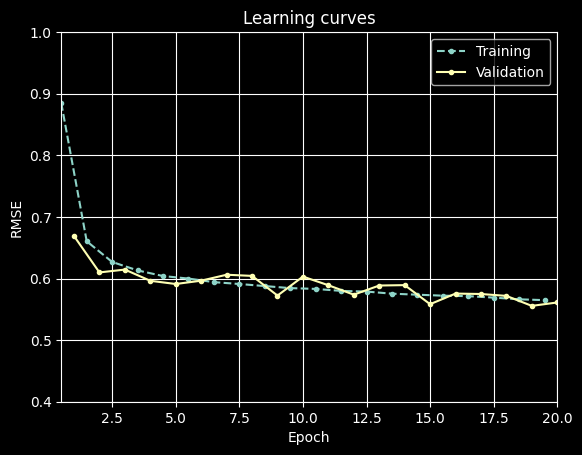

In [37]:
def train2(model, optimizer, criterion, metric, train_loader, valid_loader,
               n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for X_batch, y_batch in train_loader:
            model.train()
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_tm(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
learning_rate = 0.01
model = nn.Sequential(
    nn.Linear(n_features, 50), nn.ReLU(),
    nn.Linear(50, 40), nn.ReLU(),
    nn.Linear(40, 30), nn.ReLU(),
    nn.Linear(30, 1)
)
model = model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train2(model, optimizer, mse, rmse, train_loader, valid_loader,
                 n_epochs)

# Since we compute the training metric
plt.plot(np.arange(n_epochs) + 0.5, history["train_metrics"], ".--",
         label="Training")
plt.plot(np.arange(n_epochs) + 1.0, history["valid_metrics"], ".-",
         label="Validation")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.grid()
plt.title("Learning curves")
plt.axis([0.5, 20, 0.4, 1.0])
plt.legend()
plt.show()

## Building Nonsequential Models Using Custom Modules

One example of a nonsequential neural network is a Wide & Deep neural network.
This architecture makes it possible for the neural network to learn both
deep patterns (using the deep path) and simple rules (through the short path). The
short path can also be used to provide manually engineered features to the neural
network. 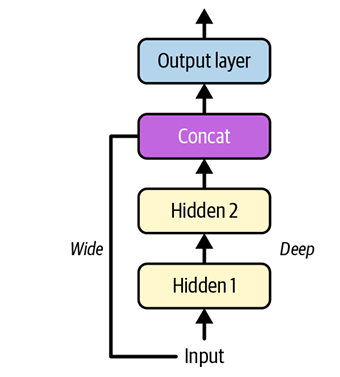

In [38]:
class WideAndDeep(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential(
            nn.Linear(n_features, 50), nn.ReLU(),
            nn.Linear(50, 40), nn.ReLU(),
            nn.Linear(40, 30), nn.ReLU(),
        )
        self.output_layer = nn.Linear(30 + n_features, 1)

    def forward(self, X):
        deep_output = self.deep_stack(X)
        wide_and_deep = torch.concat([X, deep_output], dim=1)
        return self.output_layer(wide_and_deep)

In [39]:
torch.manual_seed(42)
model = WideAndDeep(n_features).to(device)
learning_rate = 0.002

In [40]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train2(model, optimizer, mse, rmse, train_loader, valid_loader,
                 n_epochs)

Epoch 1/20, train loss: 1.7802, train metric: 1.3344, valid metric: 0.8690
Epoch 2/20, train loss: 0.6201, train metric: 0.7875, valid metric: 0.9492
Epoch 3/20, train loss: 0.5900, train metric: 0.7682, valid metric: 0.7331
Epoch 4/20, train loss: 0.5607, train metric: 0.7488, valid metric: 0.7771
Epoch 5/20, train loss: 0.5408, train metric: 0.7353, valid metric: 0.7967
Epoch 6/20, train loss: 0.5244, train metric: 0.7241, valid metric: 0.7098
Epoch 7/20, train loss: 0.5070, train metric: 0.7119, valid metric: 0.7419
Epoch 8/20, train loss: 0.4941, train metric: 0.7030, valid metric: 0.6750
Epoch 9/20, train loss: 0.4798, train metric: 0.6928, valid metric: 0.6762
Epoch 10/20, train loss: 0.4657, train metric: 0.6825, valid metric: 0.6678
Epoch 11/20, train loss: 0.4538, train metric: 0.6736, valid metric: 0.6617
Epoch 12/20, train loss: 0.4441, train metric: 0.6665, valid metric: 0.6651
Epoch 13/20, train loss: 0.4328, train metric: 0.6580, valid metric: 0.6803
Epoch 14/20, train lo